In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
from sklearn import tree


In [4]:
Heart = pd.read_csv('/Users/vaibhavgaurdeveloper/Downloads/heart.csv')

In [6]:
print(Heart.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [8]:
x=Heart.drop('target',axis=1)
y=Heart['target']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
y_pred_dt = dt.predict(x_test)
print(f"Decision Tree Accuracy:{accuracy_score(y_test,y_pred_dt):.2f}")

Decision Tree Accuracy:0.97


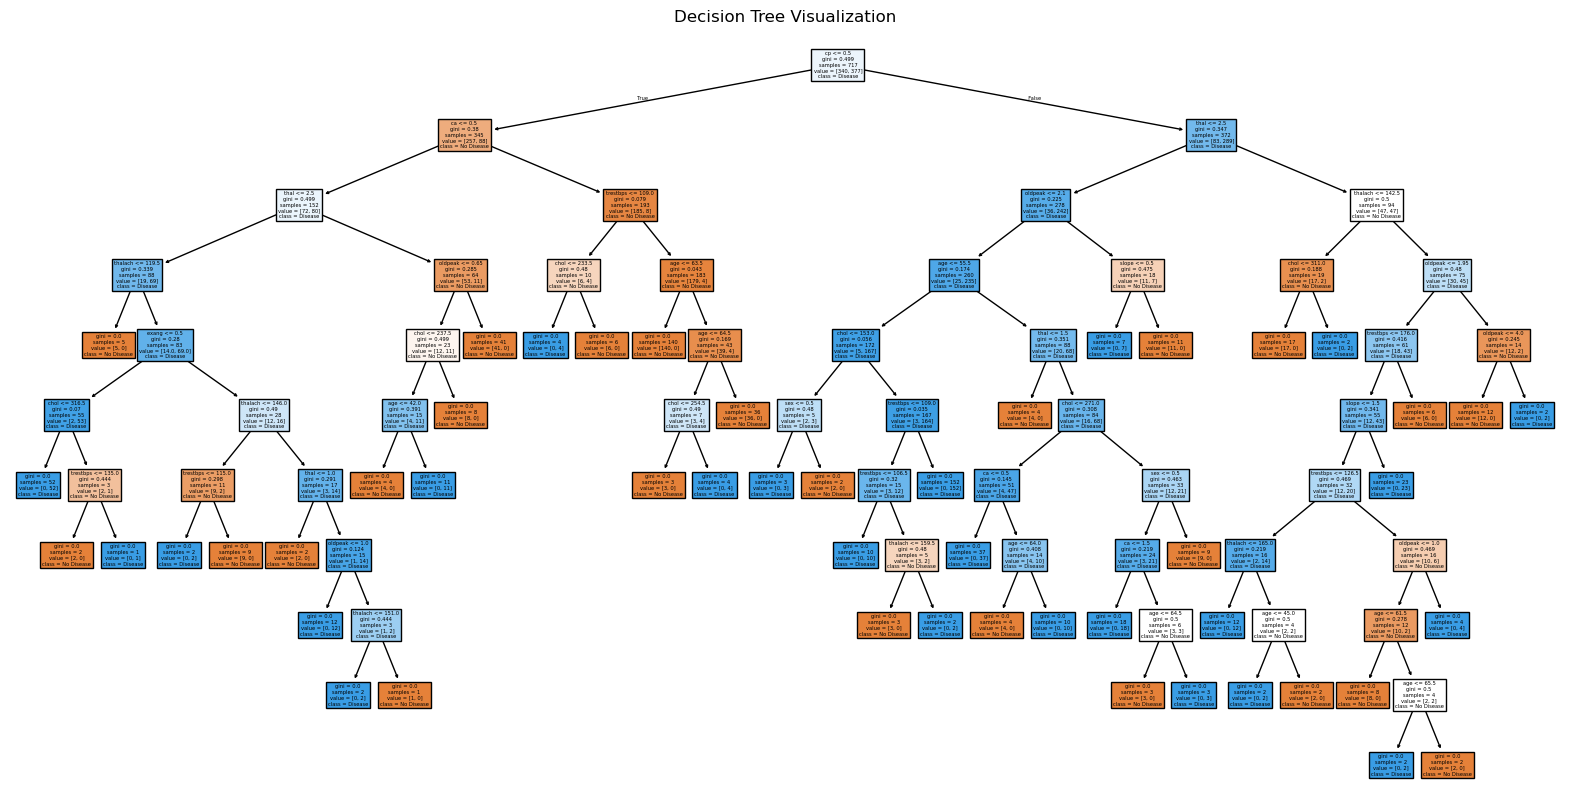

In [20]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=x.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [28]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(x_train, y_train)
y_pred_pruned = dt_pruned.predict(x_test)
print(f"Pruned Decision Tree Accuracy: {accuracy_score(y_test, y_pred_pruned):.2f}")


Pruned Decision Tree Accuracy: 0.83


In [30]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Accuracy: 0.98


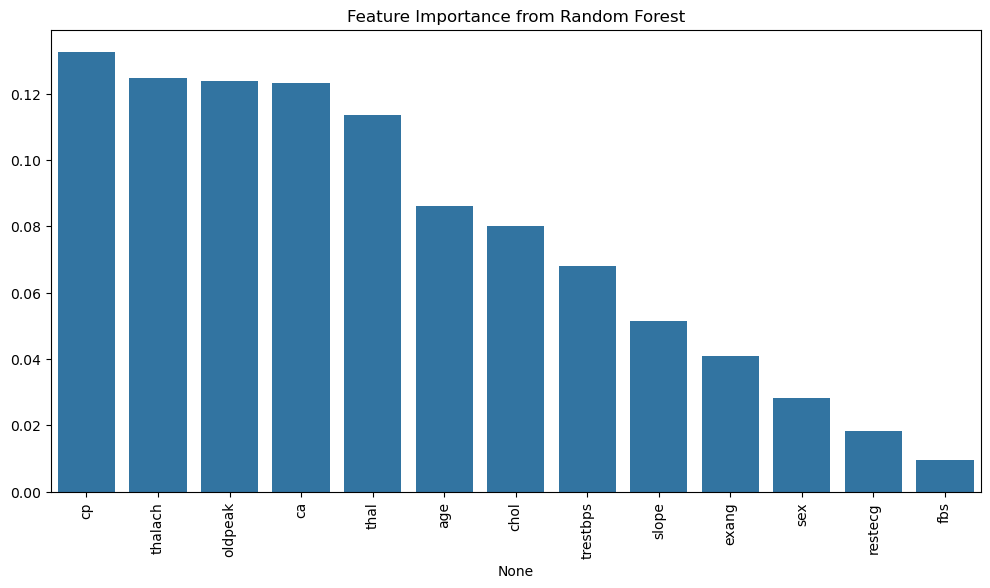

In [32]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
sns.barplot(x=x.columns[indices], y=importances[indices])
plt.title("Feature Importance from Random Forest")
plt.xticks(rotation=90)
plt.show()

In [34]:
cv_scores_dt = cross_val_score(dt_pruned, x, y, cv=5)
cv_scores_rf = cross_val_score(rf, x, y, cv=5)
print(f"Decision Tree CV Accuracy: {cv_scores_dt.mean():.2f}")
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean():.2f}")

Decision Tree CV Accuracy: 0.83
Random Forest CV Accuracy: 1.00
